### Mixture of Gaussians (MoG)

In [1]:
import numpy as np
from math import pi
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets 
import cv2
import matplotlib as mpl
from scipy import linalg

#### Guassian 1-D

In [2]:
def gauss1D(x, mean, std):
    
    g = (1.0/np.sqrt(2*pi*std**2))
    g = g * np.exp((-(x-mean)**2)/(2*std**2))
    
    return g

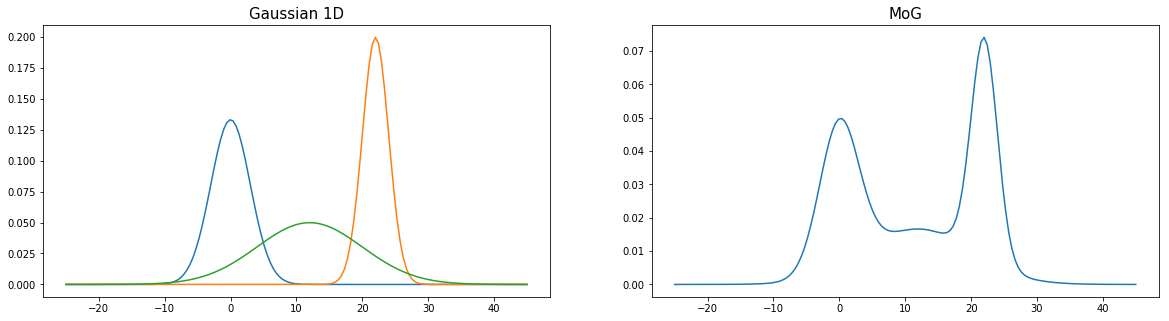

In [3]:
mean = 0
std = 3
x1 = np.linspace(-25,45,150)
g1 = gauss1D(x1, mean, std)

mean = 22
std = 2
x2 = np.linspace(-25,45,150)
g2 = gauss1D(x2, mean, std)

mean = 12
std = 8
x3 = np.linspace(-25,45,150)
g3 = gauss1D(x3, mean, std)

#linear combination

alfa1 = 0.33333
alfa2 = 0.33333
alfa3 = 0.33333

mog1D = alfa1*g1 + alfa2*g2 + alfa3*g3

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Gaussian 1D',fontsize=15)
plt.plot(x1, g1)
plt.plot(x2, g2)
plt.plot(x3, g3)

plt.subplot(1,2,2)
plt.title('MoG',fontsize=15)
plt.plot(x1, mog1D)


plt.show()

#### Guassian 2-D

In [4]:
def gauss2D(x, y, meanX, meanY, stdX, stdY):
    
    a = np.sqrt( (2*pi)**2 * (stdX*stdY) )
    e = -( ((x-meanX)**2)/(2*stdX**2) + ((y-meanY)**2)/(2*stdY**2) )
    g = a*np.exp(e)
    
    return g

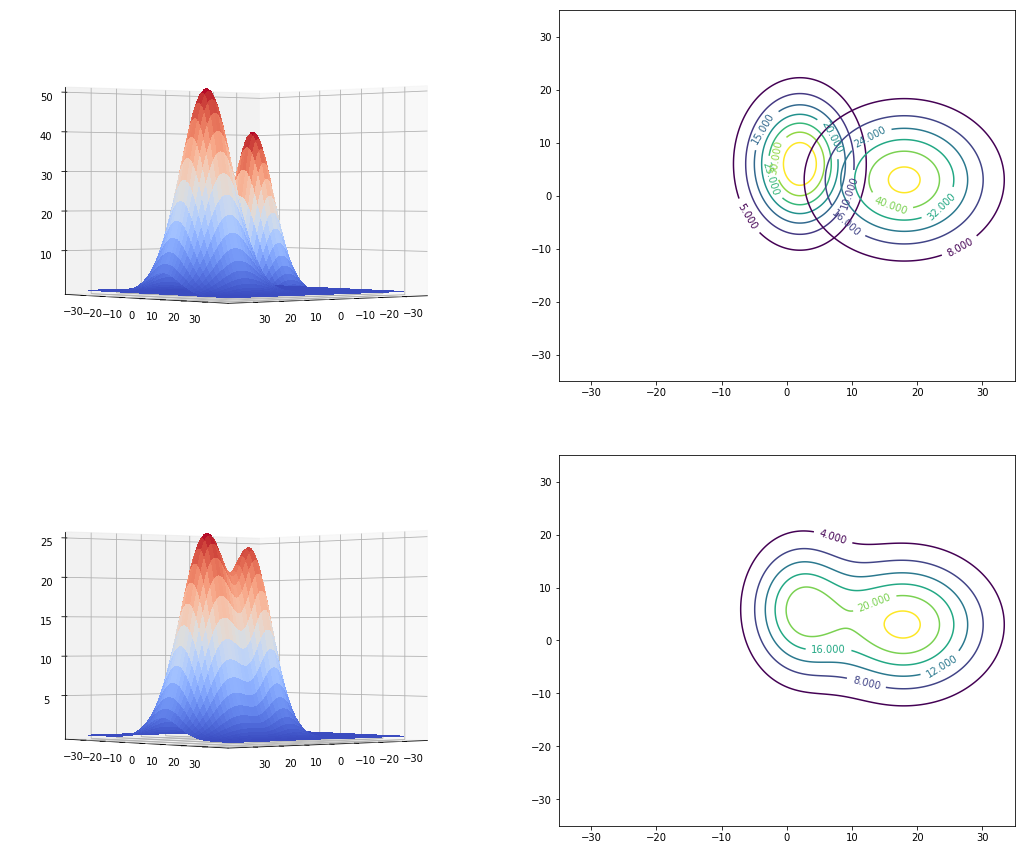

In [5]:
x = np.linspace(-35,35,400)
y = x

xx,yy = np.meshgrid(x,y)

meanX = 2
stdX = 5
meanY = 6
stdY = 8
g1 = gauss2D(xx, yy, meanX, meanY, stdX, stdY)


meanX = 18
stdX = 8
meanY = 3
stdY = 8
g2 = gauss2D(xx, yy, meanX, meanY, stdX, stdY)

# linear combination
alfa1 = 0.5
alfa2 = 0.5

mog2D = alfa1*g1 + alfa2*g2

fig = plt.figure(figsize=(18,15))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(0, 50)
surf = ax.plot_surface(xx, yy, g1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(xx, yy, g2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax = plt.subplot(2,2,2)
cs = ax.contour(xx, yy, g1)
ax.clabel(cs, inline=1, fontsize=10)
cs = ax.contour(xx, yy, g2)
ax.clabel(cs, inline=1, fontsize=10)


ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.view_init(0, 50)
ax.plot_surface(xx, yy, mog2D, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax = plt.subplot(2,2,4)
cs = ax.contour(xx, yy, mog2D)
ax.clabel(cs, inline=1, fontsize=10)


plt.show()

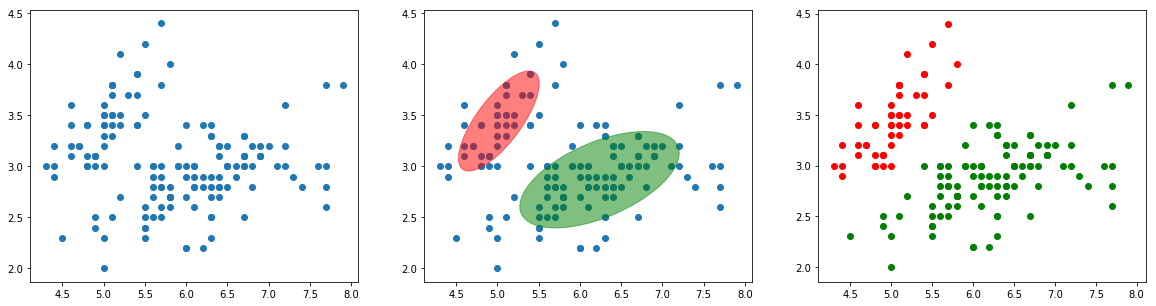

In [110]:
iris = datasets.load_iris()
pts = iris.data[:, :2] # take the first two features.

K = 2
gmm = GaussianMixture(n_components=K)
gmm = gmm.fit(pts)
cluster = gmm.predict(pts)

color_iter = ['r', 'g', 'b']
plt.figure(figsize=(20,5))


plt.subplot(1, 3, 1)
plt.scatter(pts[:,0], pts[:,1])

splot = plt.subplot(1, 3, 2)
#https://scikit-learn.org/0.15/auto_examples/mixture/plot_gmm_sin.html
for i in range(K):
    mean = gmm.means_[i]
    covar = gmm.covariances_[i]

    v, w = linalg.eigh(covar)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / linalg.norm(w[0])

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color_iter[i])
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.scatter(pts[:,0], pts[:,1])

plt.subplot(1, 3, 3)


for i in range(len(cluster)):
    
    if cluster[i] == 0:
        plt.scatter(pts[i,0], pts[i,1], color='r')
    else:
        plt.scatter(pts[i,0], pts[i,1], color='g')
    


plt.show()

In [130]:
def image_segmentation(img, K = 2):

    data = img.reshape(-1,3)
    
    gmm = GaussianMixture(n_components=K)
    gmm = gmm.fit(data)
    
#     print(gmm.means_)
#     print()
#     print(gmm.covariances_)

    cluster = gmm.predict(data)
    cluster = cluster.reshape(img.shape[0], img.shape[1])
    
    return cluster

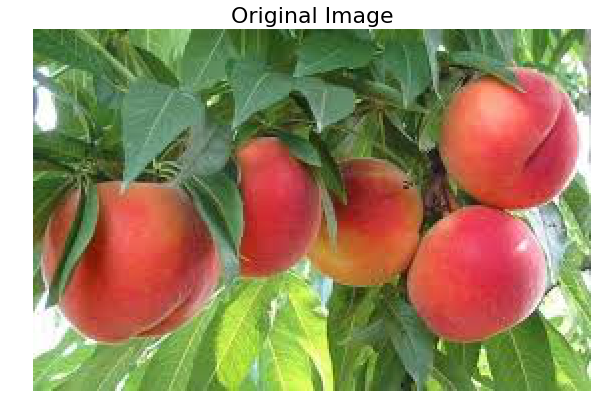

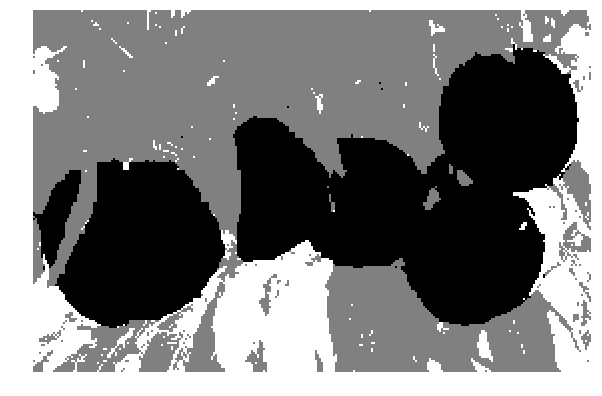

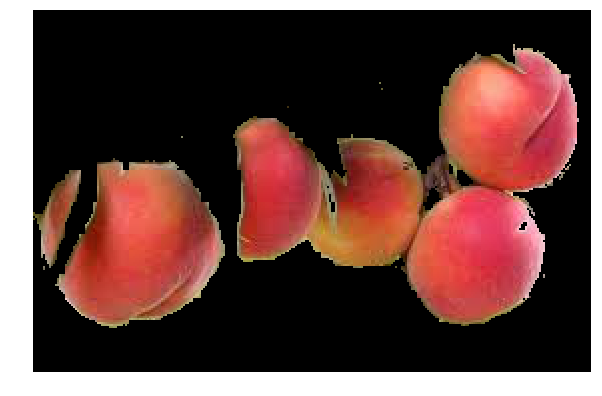

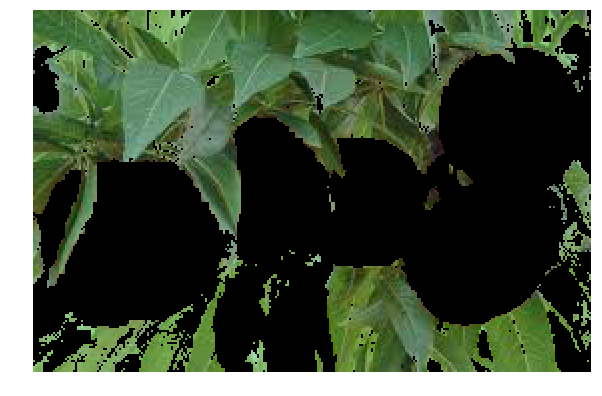

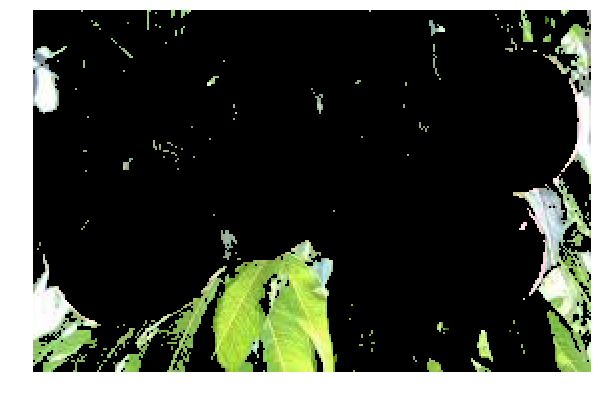

In [143]:
img = cv2.imread("image_fruit.jpg")

plt.figure(figsize=(10,10))


plt.title('Original Image',fontsize=22)
plt.axis("off")
plt.imshow(img[...,::-1],'gray')


img_seg = image_segmentation(img, 3)
plt.figure(figsize=(10,10))
plt.imshow(img_seg,'gray')
plt.axis('off')


plt.figure(figsize=(10,10))
mask = img_seg == 0
res = cv2.bitwise_and(img, img, mask = np.uint8(mask))
plt.imshow(res[...,::-1])
plt.axis('off')

plt.figure(figsize=(10,10))
mask = img_seg == 1
res = cv2.bitwise_and(img, img, mask = np.uint8(mask))
plt.imshow(res[...,::-1])
plt.axis('off')

plt.figure(figsize=(10,10))
mask = img_seg == 2
res = cv2.bitwise_and(img, img, mask = np.uint8(mask))
plt.imshow(res[...,::-1])
plt.axis('off')

plt.show()
